In [1]:
from Face_Mask_CNN import Face_Mask_CNN3
import torch

In [2]:
model = Face_Mask_CNN3(num_classes=5)
model.load_state_dict(torch.load('saved_model.pth'))
model.eval()

Face_Mask_CNN3(
  (conv1): Conv2d(3, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(12, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(20, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(32, 46, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(46, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=262144, out_features=5, bias=True)
)

In [3]:
import zipfile

with zipfile.ZipFile("./Data_Set.zip", 'r') as zip:
    zip.extractall(path="./data")

In [4]:
import os

data_path = "./data/Data Set"
print(os.listdir(data_path))
categories = os.listdir(data_path + "/Prediction")
print(categories)

['.DS_Store', 'References used - Test', 'Prediction', 'References Used Train', 'Train']
['Mask_Worn_Incorrectly', 'Surgical Mask', 'N95 Mask', 'No face Mask', 'Cloth Mask']


In [5]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import transforms
from torch.utils.data.dataloader import DataLoader
batch_size=128

transforms = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5],
                         [0.5, 0.5, 0.5])
])
prediction_Data_Set = ImageFolder(data_path + "/Prediction", transform=transforms)
prediction_data_loader = DataLoader(prediction_Data_Set, batch_size, shuffle=True, num_workers=4, pin_memory=True)

Getting predictions from Prediction set...


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

P: Predicted class 
 A: Actual class


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

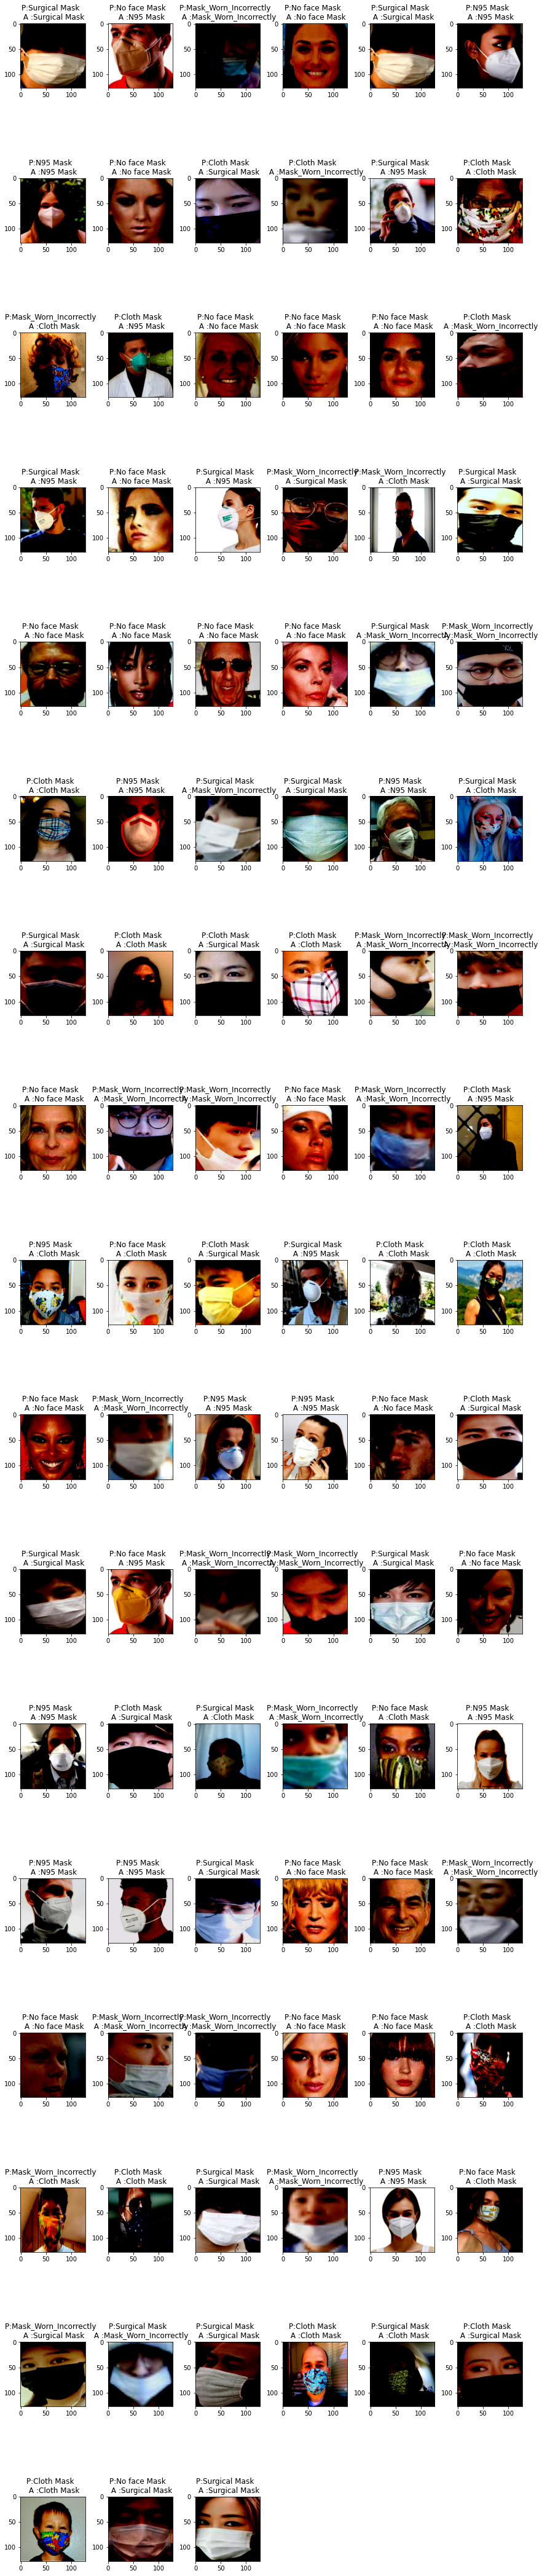

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

truelabels = []
predictions = []
images = []
model.eval().to('cpu')
pos = 1
print("Getting predictions from Prediction set...")
for data, target in prediction_data_loader:
    for label in target.data.numpy():
        truelabels.append(label)
    for prediction in model(data).data.numpy().argmax(1):
        predictions.append(prediction)
        pos+=1
    for img in data:
        images.append(img)
plt.rcParams["figure.figsize"] = [12, 70]
plt.rcParams["figure.autolayout"] = True

print('P: Predicted class \n A: Actual class')
for i in range(1,len(images)):
    plt.subplot(20, 6, i)
    plt.imshow(images[i-1].permute(1, 2, 0))
    plt.title("P:{}  \n A :{}".format(prediction_Data_Set.classes[predictions[i-1]],prediction_Data_Set.classes[truelabels[i-1]]))


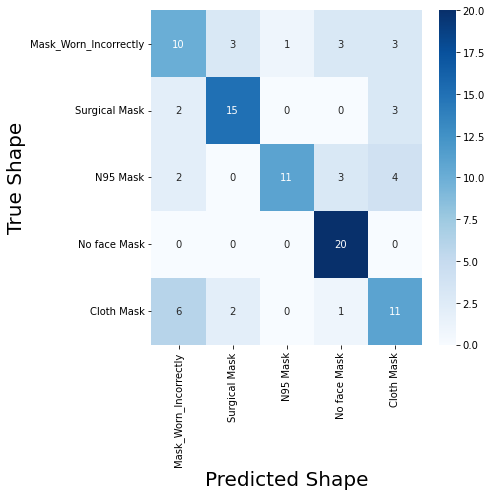

In [7]:
import numpy as np
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns

cm = confusion_matrix(truelabels, predictions)
tick_marks = np.arange(len(categories))
df_cm = pd.DataFrame(cm, index = categories, columns = categories)
plt.figure(figsize = (7,7))
sns.heatmap(df_cm, annot=True, cmap=plt.cm.Blues, fmt='g')
plt.xlabel("Predicted Shape", fontsize = 20)
plt.ylabel("True Shape", fontsize = 20)
plt.show()

In [8]:
from sklearn.metrics import classification_report

report = classification_report(truelabels, predictions, target_names= categories)
print(report)

                       precision    recall  f1-score   support

Mask_Worn_Incorrectly       0.50      0.50      0.50        20
        Surgical Mask       0.75      0.75      0.75        20
             N95 Mask       0.92      0.55      0.69        20
         No face Mask       0.74      1.00      0.85        20
           Cloth Mask       0.52      0.55      0.54        20

             accuracy                           0.67       100
            macro avg       0.69      0.67      0.67       100
         weighted avg       0.69      0.67      0.67       100

